In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(6,8)})

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d architsharma01/loan-approval-prediction-dataset














cp: cannot stat 'kaggle.json': No such file or directory

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory

Dataset URL: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

License(s): MIT


  0% 0.00/80.6k [00:00<?, ?B/s]

100% 80.6k/80.6k [00:00<00:00, 60.4MB/s]


In [ ]:
! unzip /content/loan-approval-prediction-dataset.zip

Archive:  /content/loan-approval-prediction-dataset.zip

  inflating: loan_approval_dataset.csv  


In [ ]:
df = pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# Data Cleaning

In [ ]:
df.drop('loan_id', axis = 1 , inplace = True)


In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 4269 entries, 0 to 4268

Data columns (total 12 columns):

 #   Column                     Non-Null Count  Dtype 

---  ------                     --------------  ----- 

 0    no_of_dependents          4269 non-null   int64 

 1    education                 4269 non-null   object

 2    self_employed             4269 non-null   object

 3    income_annum              4269 non-null   int64 

 4    loan_amount               4269 non-null   int64 

 5    loan_term                 4269 non-null   int64 

 6    cibil_score               4269 non-null   int64 

 7    residential_assets_value  4269 non-null   int64 

 8    commercial_assets_value   4269 non-null   int64 

 9    luxury_assets_value       4269 non-null   int64 

 10   bank_asset_value          4269 non-null   int64 

 11   loan_status               4269 non-null   object

dtypes: int64(9), object(3)

memory usage: 400.3+ KB


In [ ]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(' ' , '')

In [ ]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [ ]:
cat_cols = ['no_of_dependents', 'education', 'self_employed', 'loan_status']

In [ ]:
for col in cat_cols:
    print( df[col].value_counts())
    print("-" * 20)

no_of_dependents

4    752

3    727

0    712

2    708

1    697

5    673

Name: count, dtype: int64

--------------------

education

 Graduate        2144

 Not Graduate    2125

Name: count, dtype: int64

--------------------

self_employed

 Yes    2150

 No     2119

Name: count, dtype: int64

--------------------

loan_status

 Approved    2656

 Rejected    1613

Name: count, dtype: int64

--------------------


In [ ]:
df['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
Approved,0.62216
Rejected,0.37784


**Notice: Imbalanced Dataset Lables**

In [ ]:
df.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [ ]:
df.duplicated().sum()

0

## Feature Analysis

In [ ]:
df.describe(include="number")

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
df[df.bank_asset_value > 14500000]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1272,5,Not Graduate,No,9900000,35800000,20,470,9500000,18400000,39100000,14700000,Rejected
1633,0,Graduate,Yes,9800000,23200000,10,573,23900000,3300000,23600000,14600000,Approved
1674,1,Not Graduate,No,9800000,21300000,2,356,23000000,12300000,25700000,14600000,Rejected
1805,5,Not Graduate,No,9900000,33600000,20,580,7000000,10800000,37400000,14700000,Approved


In [ ]:
df.corr(numeric_only=True)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


### Loan Status, Loan Amount, Annual Income

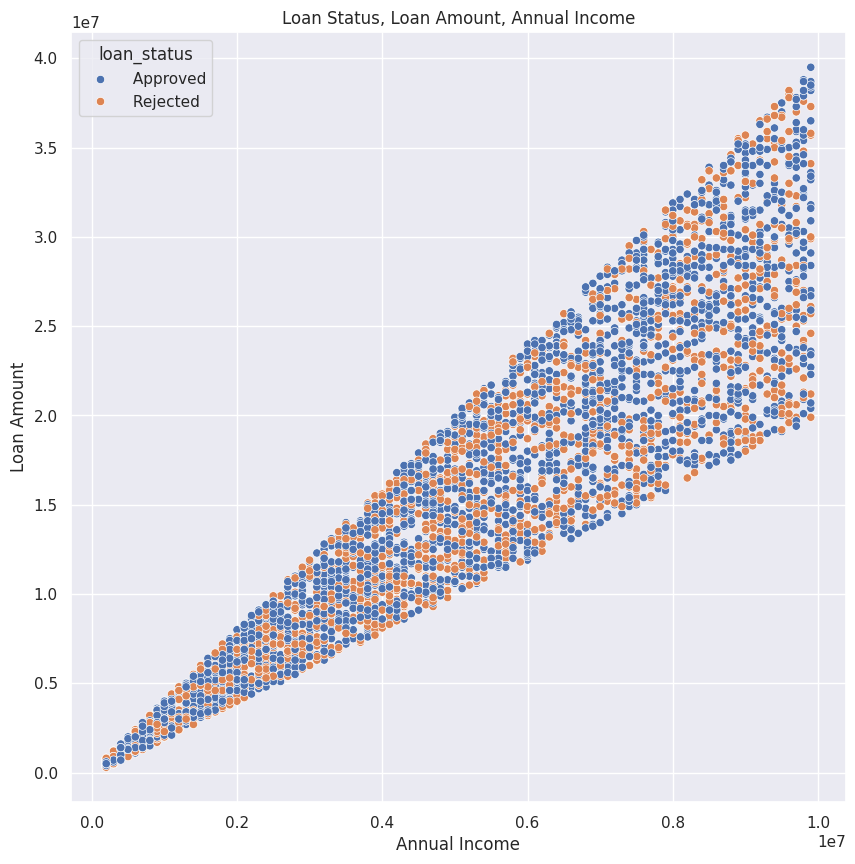

In [ ]:
sns.scatterplot(x=df['income_annum'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

### Loan Status, Loan Amount, luxury_assets_value

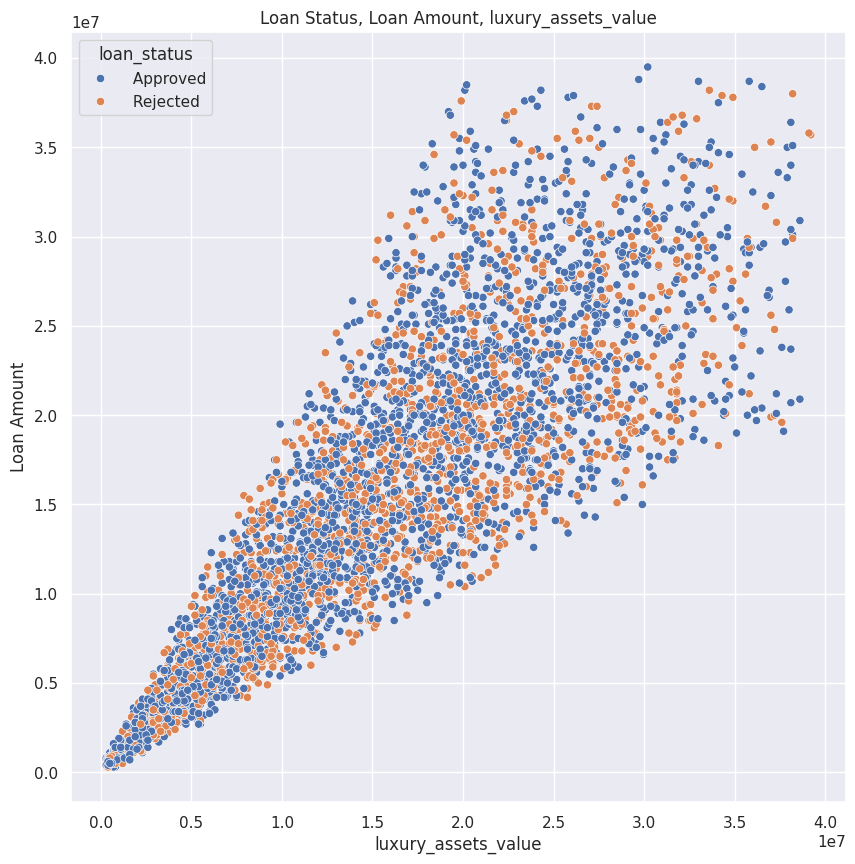

In [ ]:
sns.scatterplot(x=df['luxury_assets_value'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, luxury_assets_value")
plt.xlabel("luxury_assets_value")
plt.ylabel("Loan Amount")
plt.show()

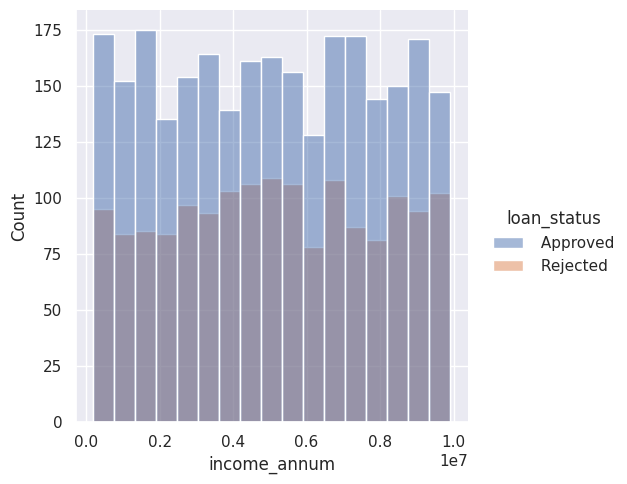

In [ ]:
sns.displot(data = df , x ="income_annum",hue='loan_status')

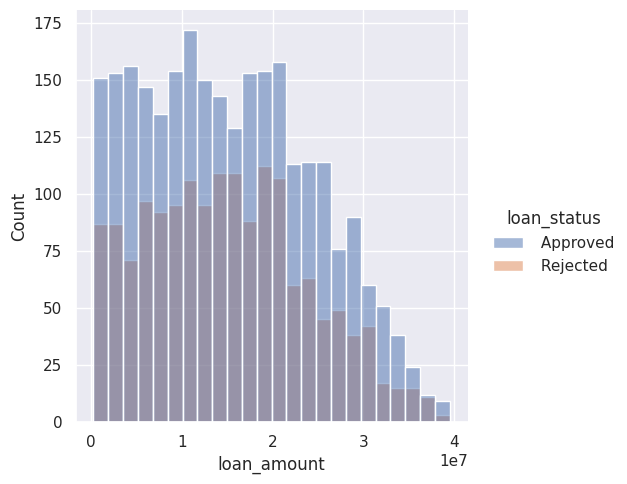

In [ ]:
sns.displot(data = df , x ="loan_amount",hue='loan_status')

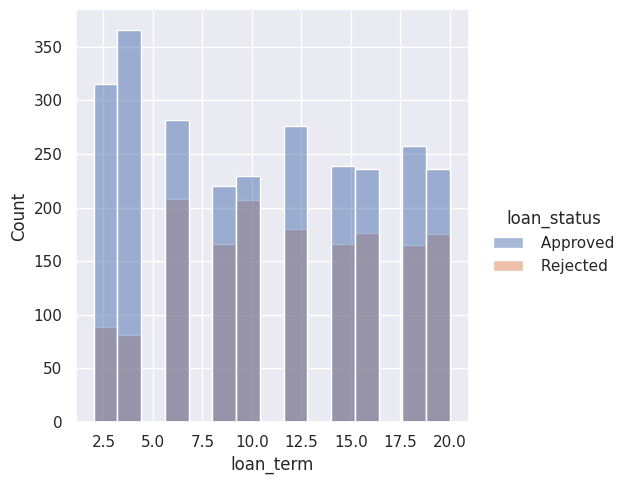

In [ ]:
sns.displot(data = df , x ="loan_term",hue='loan_status')

***Note the short loan terms are more approved than long terms ***

### Outliers

In [ ]:
from scipy import stats

In [ ]:

def detect_outliers_iqr(df, columns):
  Q1 = df[columns].quantile(0.25)
  Q3 = df[columns].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[columns] < lower_bound) | (df[columns] > upper_bound)].any(axis=1)
  return outliers

In [ ]:
# Detect outliers using IQR
outliers_iqr = detect_outliers_iqr(df, ['loan_term','income_annum','residential_assets_value','luxury_assets_value','bank_asset_value'])
print("Outliers using IQR:\n", outliers_iqr.sum())


Outliers using IQR:

 57


# Data Pre-Processing

In [ ]:
df.loan_term.describe()

,loan_term
count,4269.000000
mean,10.900445
std,5.709187
min,2.000000
25%,6.000000
50%,10.000000
75%,16.000000
max,20.000000


In [ ]:
df.loan_term = df.loan_term * 365

In [ ]:
df.loan_term.describe()

,loan_term
count,4269.000000
mean,3978.662450
std,2083.853357
min,730.000000
25%,2190.000000
50%,3650.000000
75%,5840.000000
max,7300.000000


In [ ]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [ ]:
categorical_features = ['education', 'self_employed', 'loan_status']

In [ ]:
cat_df = df[categorical_features]

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler


## Encoding

In [ ]:
def encode_features(df, categorical_features):
  # One-hot encoding for nominal features
  encoder = OneHotEncoder(sparse_output=False)
  encoded_data = encoder.fit_transform(df)
  encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
  return encoded_df

encoded_df = encode_features(cat_df, categorical_features)
encoded_df


,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
4264,1.0,0.0,0.0,1.0,0.0,1.0
4265,0.0,1.0,0.0,1.0,1.0,0.0
4266,0.0,1.0,1.0,0.0,0.0,1.0
4267,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
encoded_df.columns

Index(['education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes', 'loan_status_ Approved', 'loan_status_ Rejected'],
      dtype='object')

In [ ]:
encoded_df = encoded_df[['education_ Graduate', 'self_employed_ Yes', 'loan_status_ Approved' ]]

In [ ]:
df_encode = df
df_encode[['education', 'self_employed', 'loan_status']] = encoded_df[['education_ Graduate', 'self_employed_ Yes', 'loan_status_ Approved' ]]

In [ ]:
df_encode.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [ ]:
from sklearn.model_selection import train_test_split
x = df_encode.drop('loan_status', axis=1)
y = df_encode['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=79, stratify=y)

In [ ]:
numerical_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score','residential_assets_value', 'commercial_assets_value', 'bank_asset_value', 'luxury_assets_value']
xtrain_num = x_train[numerical_features]
xtest_num = x_test[numerical_features]

In [ ]:
xtrain_num

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,luxury_assets_value
451,500000,900000,6570,618,1400000,600000,400000,1200000
1464,4400000,17300000,7300,840,3600000,5100000,2300000,12900000
2699,5500000,14800000,3650,354,16000000,3400000,7700000,21200000
462,4400000,14700000,5840,638,4000000,2700000,2700000,14400000
1348,9400000,20000000,1460,350,3300000,1400000,4700000,37200000
...,...,...,...,...,...,...,...,...
1412,6900000,21400000,3650,577,12500000,2200000,6300000,14900000
256,9800000,35400000,2190,869,14400000,16400000,10300000,22800000
4133,3000000,8800000,5110,402,5600000,5300000,4200000,8600000
1424,8500000,25400000,1460,336,8500000,1200000,9000000,30600000


## Scaling Data

# **Model Selection**

In [ ]:
scaler = RobustScaler(quantile_range=(20, 80))
scaler.fit(xtrain_num)
train_feats_scaled = pd.DataFrame(scaler.transform(xtrain_num),columns=xtrain_num.columns)
test_feats_scaled = pd.DataFrame(scaler.transform(xtest_num),columns=xtest_num.columns)

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
train_feats_scaled

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,luxury_assets_value
0,-0.790378,-0.805134,0.666667,0.053672,-0.368421,-0.397436,-0.709459,-0.779446
1,-0.120275,0.151692,0.833333,0.680791,-0.175439,0.179487,-0.388514,-0.103926
2,0.068729,0.005834,0.000000,-0.692090,0.912281,-0.038462,0.523649,0.375289
3,-0.120275,0.000000,0.500000,0.110169,-0.140351,-0.128205,-0.320946,-0.017321
4,0.738832,0.309218,-0.500000,-0.703390,-0.201754,-0.294872,0.016892,1.299076
...,...,...,...,...,...,...,...,...
3410,0.309278,0.390898,0.000000,-0.062147,0.605263,-0.192308,0.287162,0.011547
3411,0.807560,1.207701,-0.333333,0.762712,0.771930,1.628205,0.962838,0.467667
3412,-0.360825,-0.344224,0.333333,-0.556497,0.000000,0.205128,-0.067568,-0.352194
3413,0.584192,0.624271,-0.500000,-0.742938,0.254386,-0.320513,0.743243,0.918014


In [ ]:
x_train.drop(numerical_features, axis=1, inplace=True)
x_test.drop(numerical_features, axis=1, inplace=True)

In [ ]:
x_train.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0


In [ ]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

In [ ]:
train_feats_scaled.shape

(3415, 8)

In [ ]:
x_train_new = pd.concat([x_train, train_feats_scaled], axis=1)
x_test_new = pd.concat([x_test, test_feats_scaled], axis=1)

In [ ]:
x_train_new

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,luxury_assets_value
0,5,1.0,1.0,-0.790378,-0.805134,0.666667,0.053672,-0.368421,-0.397436,-0.709459,-0.779446
1,5,1.0,1.0,-0.120275,0.151692,0.833333,0.680791,-0.175439,0.179487,-0.388514,-0.103926
2,4,1.0,1.0,0.068729,0.005834,0.000000,-0.692090,0.912281,-0.038462,0.523649,0.375289
3,0,1.0,0.0,-0.120275,0.000000,0.500000,0.110169,-0.140351,-0.128205,-0.320946,-0.017321
4,0,1.0,1.0,0.738832,0.309218,-0.500000,-0.703390,-0.201754,-0.294872,0.016892,1.299076
...,...,...,...,...,...,...,...,...,...,...,...
3410,4,1.0,1.0,0.309278,0.390898,0.000000,-0.062147,0.605263,-0.192308,0.287162,0.011547
3411,3,1.0,1.0,0.807560,1.207701,-0.333333,0.762712,0.771930,1.628205,0.962838,0.467667
3412,5,1.0,1.0,-0.360825,-0.344224,0.333333,-0.556497,0.000000,0.205128,-0.067568,-0.352194
3413,5,1.0,0.0,0.584192,0.624271,-0.500000,-0.742938,0.254386,-0.320513,0.743243,0.918014


In [ ]:
x_test_new

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,luxury_assets_value
0,2,1.0,1.0,0.103093,0.017503,0.833333,-0.612994,0.666667,0.256410,0.236486,-0.167436
1,1,0.0,1.0,0.034364,0.245041,0.500000,-0.672316,-0.464912,0.166667,0.152027,-0.161663
2,5,0.0,1.0,0.738832,0.694282,0.833333,0.485876,0.403509,1.141026,1.199324,1.281755
3,4,0.0,0.0,-0.274914,-0.303384,-0.666667,0.158192,0.377193,0.371795,-0.253378,-0.306005
4,3,0.0,1.0,0.756014,0.554259,-0.166667,0.790960,-0.219298,1.730769,1.368243,0.675520
...,...,...,...,...,...,...,...,...,...,...,...
849,0,0.0,1.0,-0.429553,-0.379230,-0.166667,0.087571,0.035088,0.153846,-0.439189,-0.415704
850,5,0.0,1.0,-0.171821,-0.134189,-0.166667,-0.819209,0.228070,-0.346154,-0.219595,-0.098152
851,1,1.0,1.0,-0.274914,-0.227538,0.333333,0.093220,0.114035,-0.282051,-0.067568,-0.219400
852,3,1.0,1.0,-0.360825,-0.420070,-0.333333,0.796610,-0.368421,0.102564,-0.388514,-0.496536


In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
models = list()
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(("xg" , XGBClassifier()))
models.append(("GB" , GradientBoostingClassifier()))

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
for model in models:
  print(model[0])
  model[1].fit(x_train_new, y_train)
  y_pred = model[1].predict(x_test_new)
  print(classification_report(y_test, y_pred))
  print("O" * 50)
  print('roc_auc_score ',roc_auc_score(y_test, y_pred))
  print('f1_score ',f1_score(y_test, y_pred))
  print("-" * 50)

CART

              precision    recall  f1-score   support



         0.0       0.98      0.98      0.98       323

         1.0       0.99      0.99      0.99       531



    accuracy                           0.99       854

   macro avg       0.99      0.99      0.99       854

weighted avg       0.99      0.99      0.99       854



OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

roc_auc_score  0.9860039763749687

f1_score  0.9896519285042333

--------------------------------------------------

RF

              precision    recall  f1-score   support



         0.0       0.98      0.98      0.98       323

         1.0       0.98      0.99      0.99       531



    accuracy                           0.98       854

   macro avg       0.98      0.98      0.98       854

weighted avg       0.98      0.98      0.98       854



OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

roc_auc_score  0.9810247619713959

f1_score  0.9858889934148636

--------------------------------

# hyperparameters tuning XGBoost

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [ 30,40,50,60],
    'min_child_weight': [0.5, 1, 5, 9],
    'gamma': [0.0, 0.5, 1, 2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}


In [ ]:
model = XGBClassifier(max_depth=7 , n_estimators=40,learning_rate=0.1,min_child_weight=.4 )

In [ ]:
model.fit(x_train_new, y_train)
y_pred = model.predict(x_test_new)
print(classification_report(y_test, y_pred))
print("O" * 50)
print('roc_auc_score ',roc_auc_score(y_test, y_pred))
print('f1_score ',f1_score(y_test, y_pred))


              precision    recall  f1-score   support



         0.0       1.00      0.99      0.99       323

         1.0       0.99      1.00      1.00       531



    accuracy                           0.99       854

   macro avg       0.99      0.99      0.99       854

weighted avg       0.99      0.99      0.99       854



OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

roc_auc_score  0.9928664299499164

f1_score  0.9953051643192489


# Model Performance

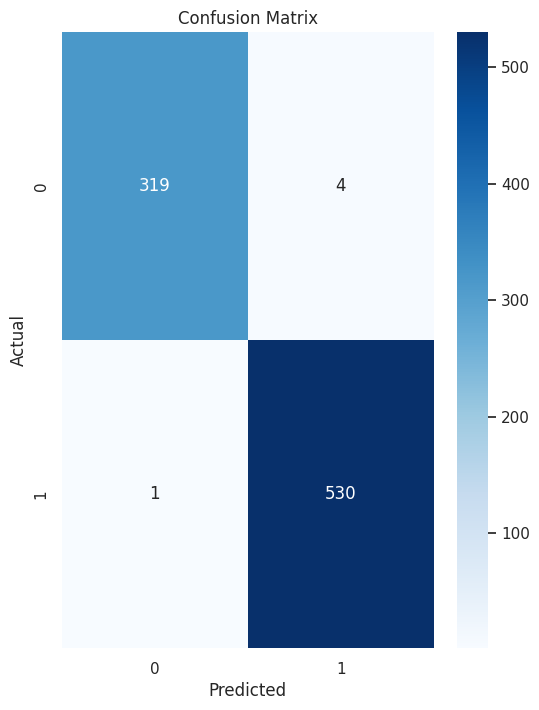

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
grid_search = GridSearchCV(estimator= model,
                           param_grid=param_grid,
                           scoring='f1_score',
                           cv=1,return_train_score=True, n_jobs=-1)


In [ ]:
grid_search.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the train scores are non-finite: [nan nan nan ... nan nan nan]

  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'gamma': [0.0, 0.5, 1, 2],
                         'learning_rate': [0.075, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 5, 9],
                         'n_estimators': [200, 300, 500],
                         'subsample': [0.8, 1.0]},
             return_train_score=True,
             scoring=<function f1_score at 0x7c78c43e5360>)

In [ ]:

forest_importances = pd.Series(model.feature_importances_, index=x_train_new.columns)
forest_importances.sort_values(ascending=False)

,0
cibil_score,0.745672
loan_term,0.179697
loan_amount,0.018316
income_annum,0.017003
luxury_assets_value,0.008763
residential_assets_value,0.008333
commercial_assets_value,0.006571
bank_asset_value,0.006506
no_of_dependents,0.004977
self_employed,0.002420


# **Model Deployment/ Inference**

In [ ]:
x_train_new.dtypes

,0
no_of_dependents,int64
education,float64
self_employed,float64
income_annum,float64
loan_amount,float64
loan_term,float64
cibil_score,float64
residential_assets_value,float64
commercial_assets_value,float64
bank_asset_value,float64


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd

Inputs = joblib.load("inputs.pkl")
Model = joblib.load("model.pkl")
Scaler = joblib.load("scaler.pkl")
num_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score','residential_assets_value', 'commercial_assets_value',
            'bank_asset_value', 'luxury_assets_value']

def predict(no_of_dependents, education , self_employed, income_annum, loan_amount, loan_term,
            cibil_score, residential_assets_value, commercial_assets_value, bank_asset_value, luxury_assets_value):
    test_df = pd.DataFrame(columns = Inputs)
    test_df.at[0,'no_of_dependents'] = no_of_dependents
    test_df.at[0,'education'] = education
    test_df.at[0,'self_employed'] = self_employed
    test_df.at[0,'income_annum'] = float(income_annum)
    test_df.at[0,'loan_amount'] = float(loan_amount)
    test_df.at[0,'loan_term'] = float(loan_term) * 365
    test_df.at[0,'cibil_score'] = float(cibil_score)
    test_df.at[0,'residential_assets_value'] = float(residential_assets_value)
    test_df.at[0,'commercial_assets_value'] = float(commercial_assets_value)
    test_df.at[0,'bank_asset_value'] = float(bank_asset_value)
    test_df.at[0,'luxury_assets_value'] = float(luxury_assets_value)
    temp_df = pd.DataFrame(Scaler.transform(test_df[num_cols]),columns=num_cols)
    test_df.drop(num_cols, axis=1, inplace=True)
    test_df = pd.concat([test_df, temp_df], axis=1)
    test_df.no_of_dependents = test_df.no_of_dependents.astype(int)
    test_df.education = test_df.education.astype(int)
    test_df.self_employed = test_df.self_employed.astype(int)
    #test_df.fillna(0, inplace=True)
    print(test_df.dtypes)
    result = Model.predict(test_df)[0]
    return result

def main():
    st.title("Loan Status Prediction")

    no_of_dependents = int(st.slider("no_of_dependents" , min_value=0, max_value=5, value=0, step=1))
    education = int(st.selectbox("Education" ,[0 , 1]))
    self_employed = int(st.selectbox("self_employed" , [0 , 1]))
    income_annum = st.slider("Applicant Income" , min_value=200000, max_value=9900000, value=200000, step=1000)
    loan_amount = st.slider("loan_amount" , min_value=300000, max_value=39500000, value=300000, step=10000)
    loan_term = st.slider("loan_term in Years" , min_value=2, max_value=20, value=2, step=1)
    cibil_score = st.slider("cibil_score" , min_value=300, max_value=900, value=300, step=1)
    residential_assets_value = st.slider("residential_assets_value" , min_value=-100000, max_value=29100000, value=0, step=10000)
    commercial_assets_value = st.slider("commercial_assets_value" , min_value=0, max_value=19400000, value=0, step=1000)
    bank_asset_value = st.slider("bank_asset_value" , min_value=0, max_value=14700000, value=0, step=10000)
    luxury_assets_value = st.slider("luxury_assets_value" , min_value=300000, max_value=39200000, value=300000, step=10000)

    if st.button("Predict"):
        result = predict(no_of_dependents, education , self_employed, income_annum, loan_amount, loan_term,
            cibil_score, residential_assets_value, commercial_assets_value, bank_asset_value, luxury_assets_value)
        label = ["Rejected","Approved"]
        st.text("The output is {}".format(label[result]))


if __name__ == '__main__':
    main()




Overwriting app.py


In [ ]:
! pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 24.2 MB/s eta 0:00:00

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.7 MB/s eta 0:00:00

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.5 MB/s eta 0:00:00

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.2 MB/s eta 0:00:00

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.5 MB/s eta 0:00:00



In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.234.43.224


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501








  You can now view your Streamlit app in your browser.



  Local URL: http://localhost:8501

  Network URL: http://172.28.0.12:8501

  External URL: http://35.234.43.224:8501



your url is: https://fresh-hairs-visit.loca.lt

no_of_dependents              int64

education                     int64

self_employed                 int64

income_annum                float64

loan_amount                 float64

loan_term                   float64

cibil_score                 float64

residential_assets_value    float64

commercial_assets_value     float64

bank_asset_value            float64

luxury_assets_value         float64

dtype: object

no_of_dependents              int64

education                     int64

self_employed                 int64

income_annum                float64

loan_amount                 float64

loan_term                   float64

cibil_score                 float64

residential_assets_value    float64

commercial_assets_value     float64

bank_asset_